In [1]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [8]:
#Store csv into Panda Dataframe

In [9]:
census_df = pd.read_csv("data/adult.csv")
census_df.shape

(32561, 15)

In [10]:
#Train with a 40/60 train/test split

In [11]:
train_df, test_df = train_test_split(
    census_df, test_size=0.6, random_state=123
)

In [13]:
#print(train_df, test_df)

In [14]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [15]:
#Replace ? with Nan values

In [16]:
train_df = train_df.replace("?", np.nan)
test_df = test_df.replace("?", np.nan)
train_df.shape

(13024, 15)

In [17]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [18]:
#Call describe to see different statistics on the dataset

In [19]:
census_summary = train_df.describe(include='all')
print(census_summary)

                 age workclass        fnlwgt education  education.num  \
count   13024.000000     12284  1.302400e+04     13024   13024.000000   
unique           NaN         8           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN      9123           NaN      4153            NaN   
mean       38.546913       NaN  1.884759e+05       NaN      10.057432   
std        13.610225       NaN  1.040895e+05       NaN       2.553084   
min        17.000000       NaN  1.376900e+04       NaN       1.000000   
25%        28.000000       NaN  1.170962e+05       NaN       9.000000   
50%        37.000000       NaN  1.778990e+05       NaN      10.000000   
75%        48.000000       NaN  2.365655e+05       NaN      12.000000   
max        90.000000       NaN  1.184622e+06       NaN      16.000000   

            marital.status      occupation relationship   race    sex  \
count                13024           12281        

In [20]:
#Store Numeric Columns

In [21]:
numeric_cols = []
numeric_cols.extend(census_df.select_dtypes(include='number'))

In [24]:
#Visualize Data comparing those who make above and below 50K income

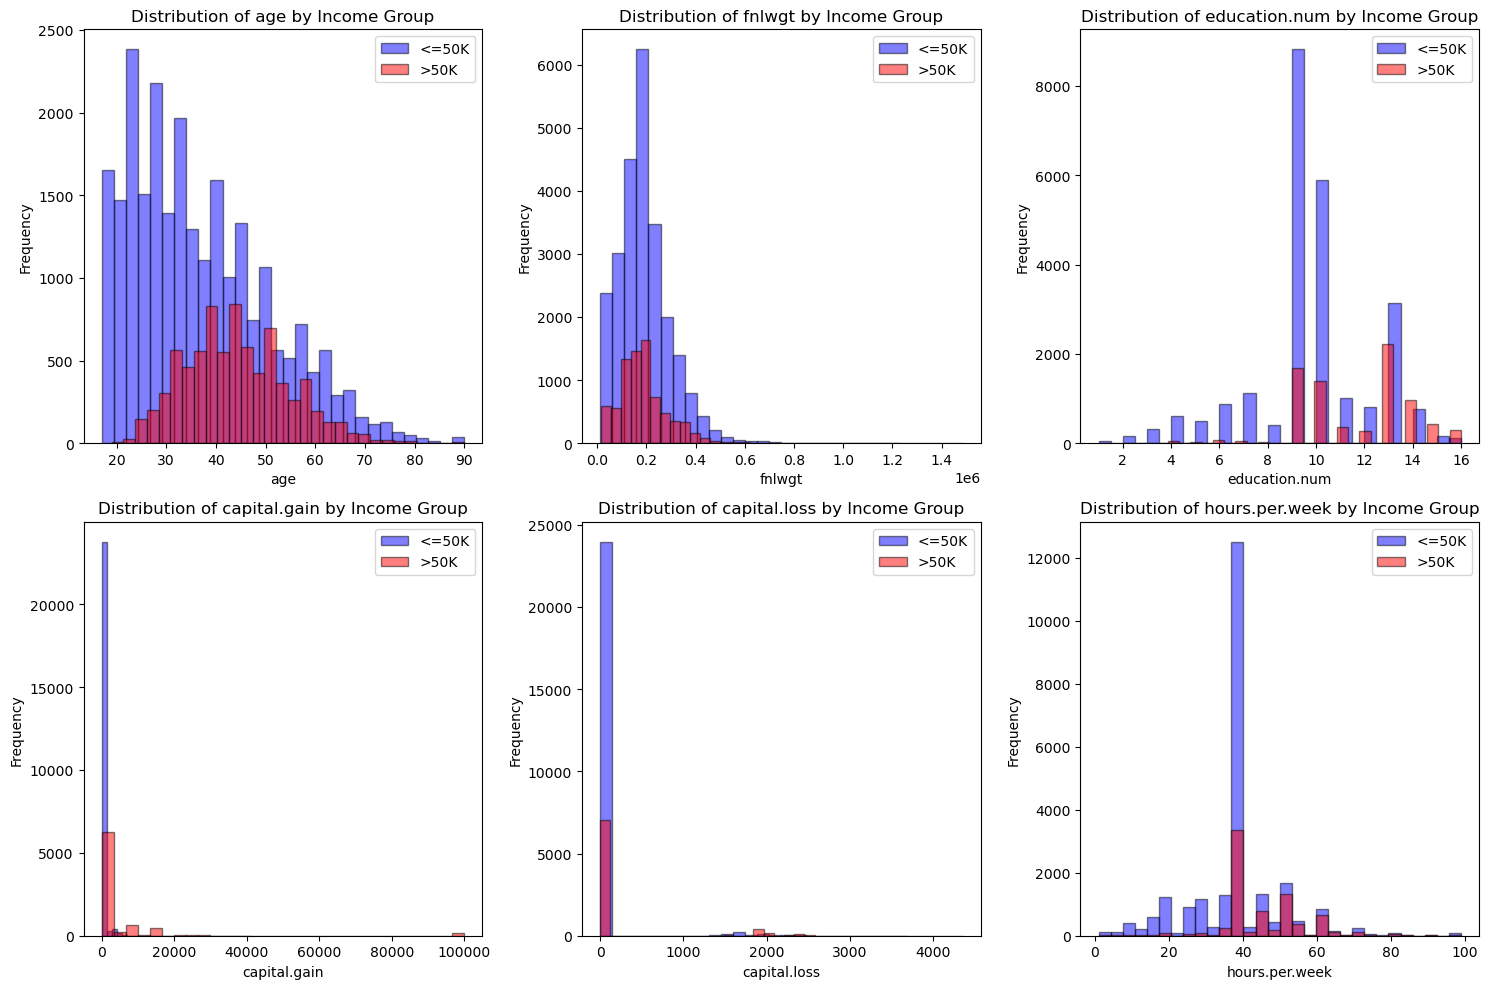

In [25]:
df_50K_less = census_df.loc[census_df["income"] == "<=50K"]
df_50K_more = census_df.loc[census_df["income"] == ">50K"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ax.hist(df_50K_less[col], bins=30, alpha=0.5, color="blue", label="<=50K", edgecolor="black")
    ax.hist(df_50K_more[col], bins=30, alpha=0.5, color="red", label=">50K", edgecolor="black")
    ax.set_title(f"Distribution of {col} by Income Group")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.legend()

plt.tight_layout()
plt.show()

In [32]:
#Now for data transformation so we can apply machine learning techniques
#For non-numeric features with a hierarchy, we can apply ordinal encoding
#For non-numeric features, we apply imputation followed by One Hot Encoding
#We drop unused or biased columns 
#We also want to scale our data for the most accurate results.

In [33]:
numeric_features = ['age', 'capital.gain', 'capital.loss', 'hours.per.week']
categorical_features = ['workclass', 'marital.status', 'occupation', 'relationship', 'native.country']
ordinal_features = ['education']
binary_features = ['sex']
drop_features = ['fnlwgt', 'education.num', 'race']
target = "income"

In [34]:
#Sort Data

In [35]:
numeric_features.sort()
categorical_features.sort()
ordinal_features.sort()
binary_features.sort()
drop_features.sort()

In [36]:
#Creating the Baseline Model

In [38]:
X_train = train_df.drop(columns=['income'])
y_train = train_df["income"]
X_test = test_df.drop(columns=['income'])
y_test = test_df["income"]

In [39]:
print(X_train.shape)

(13024, 14)


In [40]:
#Dummy Classifier will be our baseline model. Lets cross-validate and return the score.

In [41]:
dummy = DummyClassifier(strategy="most_frequent")
scores = cross_validate(dummy, X_train, y_train, return_train_score=True)
dummy_df = pd.DataFrame(scores)

In [42]:
print(dummy_df)

   fit_time  score_time  test_score  train_score
0  0.006434    0.003546    0.758157     0.758230
1  0.005384    0.002267    0.758157     0.758230
2  0.004224    0.002052    0.758157     0.758230
3  0.004079    0.001794    0.758157     0.758230
4  0.003406    0.001635    0.758449     0.758157


In [46]:
#Now, for our more complex models. We want to apply various transformations on our data without leakage.
#To adhere to the Golden Rule, we're going to use a pipeline with a Column Transformer.

In [48]:
from sklearn.preprocessing import StandardScaler
numeric_transformer = StandardScaler()

In [50]:
from sklearn.preprocessing import OrdinalEncoder
education_order = [["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", "HS-grad", "Prof-school", "Assoc-voc", "Assoc-acdm", "Some-college", "Bachelors", "Masters", "Doctorate"]]
ordinal_transformer = OrdinalEncoder(categories=education_order, dtype=int)

In [51]:
from sklearn.preprocessing import OneHotEncoder
binary_transformer = OneHotEncoder(drop='if_binary', sparse_output=False, dtype=int) 

In [52]:
from sklearn.pipeline import make_pipeline
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"), 
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [53]:
from sklearn.compose import make_column_transformer
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer, ordinal_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features),
)

In [54]:
transformed_df = preprocessor.fit_transform(X_train)

In [55]:
results_dict = {}  # dictionary to store all the results

In [56]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [57]:
# Baseline model

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(random_state = 123)
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.023 (+/- 0.010),0.008 (+/- 0.003),0.758 (+/- 0.000),0.758 (+/- 0.000)


In [58]:
#Import different models

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "decision tree": DecisionTreeClassifier(random_state=123),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=123),
}

In [60]:
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model) 
    results_dict[name] = mean_std_cross_val_scores(pipeline, X_train, y_train, cv=5, return_train_score=True)

income_pred_results_df = pd.DataFrame(results_dict).T
print(income_pred_results_df)

                        fit_time         score_time         test_score  \
dummy          0.023 (+/- 0.010)  0.008 (+/- 0.003)  0.758 (+/- 0.000)   
decision tree  0.064 (+/- 0.013)  0.008 (+/- 0.001)  0.814 (+/- 0.012)   
kNN            0.025 (+/- 0.003)  0.108 (+/- 0.023)  0.836 (+/- 0.008)   
RBF SVM        1.929 (+/- 0.054)  1.191 (+/- 0.062)  0.852 (+/- 0.005)   

                     train_score  
dummy          0.758 (+/- 0.000)  
decision tree  0.987 (+/- 0.001)  
kNN            0.884 (+/- 0.003)  
RBF SVM        0.855 (+/- 0.002)  


In [61]:
#Lets also test Support Vector Classifier (SVC) with the C parameter.

In [62]:
param_grid = {"C": np.logspace(-1, 2, 4)}

In [63]:
for c in param_grid["C"]:
    pipe = make_pipeline(preprocessor, SVC(C=c))
    results_dict[c] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

print(pd.DataFrame(results_dict).T)

                        fit_time         score_time         test_score  \
dummy          0.023 (+/- 0.010)  0.008 (+/- 0.003)  0.758 (+/- 0.000)   
decision tree  0.064 (+/- 0.013)  0.008 (+/- 0.001)  0.814 (+/- 0.012)   
kNN            0.025 (+/- 0.003)  0.108 (+/- 0.023)  0.836 (+/- 0.008)   
RBF SVM        1.929 (+/- 0.054)  1.191 (+/- 0.062)  0.852 (+/- 0.005)   
0.1            2.335 (+/- 0.110)  1.583 (+/- 0.073)  0.838 (+/- 0.006)   
1.0            1.991 (+/- 0.071)  1.338 (+/- 0.067)  0.852 (+/- 0.005)   
10.0           2.015 (+/- 0.092)  1.160 (+/- 0.051)  0.858 (+/- 0.005)   
100.0          2.751 (+/- 0.063)  1.144 (+/- 0.051)  0.860 (+/- 0.006)   

                     train_score  
dummy          0.758 (+/- 0.000)  
decision tree  0.987 (+/- 0.001)  
kNN            0.884 (+/- 0.003)  
RBF SVM        0.855 (+/- 0.002)  
0.1            0.838 (+/- 0.002)  
1.0            0.855 (+/- 0.002)  
10.0           0.862 (+/- 0.002)  
100.0          0.871 (+/- 0.002)  


In [65]:
#Our test score is with SVC C value 100.0

In [66]:
#With our most accurate model, lets evaluate our test set. 

In [67]:
final_pipeline = make_pipeline(preprocessor, SVC(C=100))
final_pipeline.fit(X_train, y_train)
test_score = final_pipeline.score(X_test, y_test)

In [68]:
print(test_score)

0.8497722270563546


In [ ]:
#Now we have a model that can predict an individual's income based on various factors such as age, education, and hours etc